In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0-rc0


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Dataser : https://www.kaggle.com/mlg-ulb/creditcardfraud

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.shape

(284807, 31)

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balanced Dataset

In [13]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [14]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [16]:
non_fraud = non_fraud.sample(fraud.shape[0])

In [17]:
non_fraud.shape

(492, 31)

In [18]:
data = fraud.append(non_fraud, ignore_index=True)

In [19]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [20]:
X = data.drop('Class', axis=1)
y = data['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [23]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,39854.0,0.724748,-0.612523,-0.012670,1.268018,-0.485371,-0.304807,0.262916,-0.018452,-0.072097,...,0.306918,0.237745,0.058770,-0.368254,-0.005027,0.548135,-0.300511,-0.042794,0.049682,257.11
898,147546.0,2.242033,-1.331530,-0.291681,-1.497571,-1.548367,-0.596015,-1.320194,-0.154301,-1.187786,...,-0.332618,-0.370261,-0.575814,0.530210,1.107507,-0.600590,-0.546881,0.040874,-0.020771,17.49
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,141196.0,0.004637,0.940936,0.481097,-0.492786,0.271243,-1.322644,1.132053,-0.301872,-0.247630,...,0.037605,-0.215118,-0.401794,0.127997,0.482628,-0.504069,0.108083,0.252210,0.104644,11.99
739,80765.0,-0.380367,1.133843,1.278711,0.005191,0.264043,-0.494702,0.682083,0.029163,-0.494055,...,0.121240,-0.229223,-0.523260,0.006874,0.039898,-0.212448,0.099462,0.266307,0.096131,3.57


In [24]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [25]:
X_test.shape

(197, 30)

In [27]:
X_train

array([[-1.00761049e+00,  5.57036781e-01, -5.94450273e-01, ...,
        -1.02742331e-01,  1.90366164e-04,  7.07482444e-01],
       [ 1.19425127e+00,  8.17470778e-01, -7.74833893e-01, ...,
        -2.73855017e-02, -9.96740504e-02, -4.16482002e-01],
       [-1.44627765e+00, -2.05182298e+00,  1.19072947e+00, ...,
         2.37352907e+00, -1.47765800e+00, -4.93830193e-01],
       ...,
       [-1.57516871e+00, -3.78849207e-01,  3.23011319e-01, ...,
        -1.26369367e+00,  9.30071038e-01, -3.55973107e-01],
       [ 1.63015823e+00,  7.77198400e-01, -3.34474589e-01, ...,
        -7.23970490e-02, -1.22257918e-01, -4.36276384e-01],
       [-1.64844688e+00,  6.39426431e-01, -6.41303746e-01, ...,
        -4.99884232e-02, -1.90431584e-02, -1.28431519e-01]])

In [28]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [29]:
type(y_train)

numpy.ndarray

In [30]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [31]:
X_train = X_train.reshape(787, 30, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN Model

In [34]:
X_train[0].shape

(30, 1)

In [35]:
epochs = 20

model = Sequential()
model.add(Conv1D(filters = 32, kernel_size=2, activation='relu', input_shape=(X_train[0].shape)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

In [39]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
787/787 [==============================] - 4s 5ms/sample - loss: 0.9769 - accuracy: 0.5222 - val_loss: 0.6504 - val_accuracy: 0.7462
Epoch 2/20
787/787 [==============================] - 0s 166us/sample - loss: 0.6098 - accuracy: 0.6963 - val_loss: 0.6136 - val_accuracy: 0.6954
Epoch 3/20
787/787 [==============================] - 0s 174us/sample - loss: 0.4683 - accuracy: 0.7776 - val_loss: 0.5889 - val_accuracy: 0.6701
Epoch 4/20
787/787 [==============================] - 0s 164us/sample - loss: 0.4395 - accuracy: 0.8196 - val_loss: 0.5648 - val_accuracy: 0.6751
Epoch 5/20
787/787 [==============================] - 0s 156us/sample - loss: 0.3701 - accuracy: 0.8539 - val_loss: 0.5367 - val_accuracy: 0.7005
Epoch 6/20
787/787 [==============================] - 0s 165us/sample - loss: 0.3519 - accuracy: 0.8729 - val_loss: 0.5075 - val_acc

In [41]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

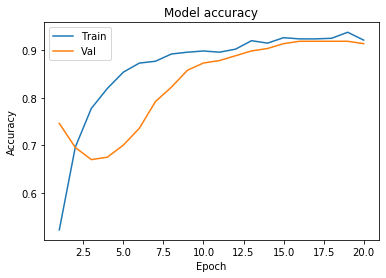

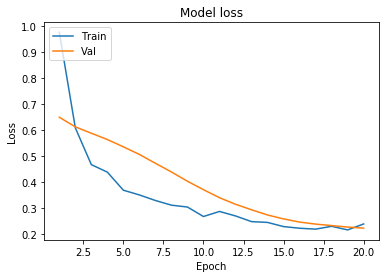

In [42]:
plot_learningCurve(history, epochs)

### Add Maxpool Layer

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 2s 2ms/sample - loss: 1.0141 - accuracy: 0.5133 - val_loss: 0.6655 - val_accuracy: 0.6599
Epoch 2/50
787/787 [==============================] - 0s 155us/sample - loss: 0.8321 - accuracy: 0.5832 - val_loss: 0.6504 - val_accuracy: 0.7005
Epoch 3/50
787/787 [==============================] - 0s 159us/sample - loss: 0.7864 - accuracy: 0.6163 - val_loss: 0.6331 - val_accuracy: 0.7056
Epoch 4/50
787/787 [==============================] - 0s 149us/sample - loss: 0.6599 - accuracy: 0.6722 - val_loss: 0.6137 - val_accuracy: 0.7056
Epoch 5/50
787/787 [==============================] - 0s 165us/sample - loss: 0.5943 - accuracy: 0.7281 - val_loss: 0.5928 - val_accuracy: 0.7056
Epoch 6/50
787/787 [==============================] - 0s 173us/sample - loss: 0.6034 - accuracy: 0.7281 - val_loss: 0.5712 - val_accuracy: 0.7056
Epoch 7/50
787/787 [==============================] - 0s 166us/sample - loss: 0.

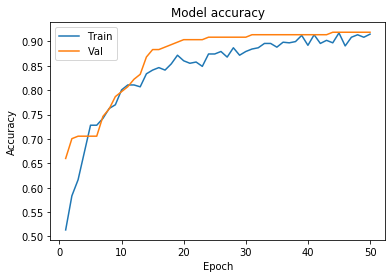

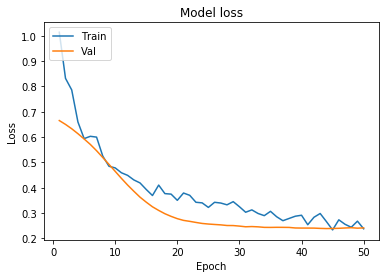

In [44]:
epochs = 50

model = Sequential()
model.add(Conv1D(filters = 32, kernel_size=2, activation='relu', input_shape=(X_train[0].shape)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
plot_learningCurve(history, epochs)